In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Expanded_data_with_more_features.csv")

In [4]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [7]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [8]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [9]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [10]:
df.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [13]:
df['IsFirstChild'].unique()

array(['yes', 'no', nan], dtype=object)

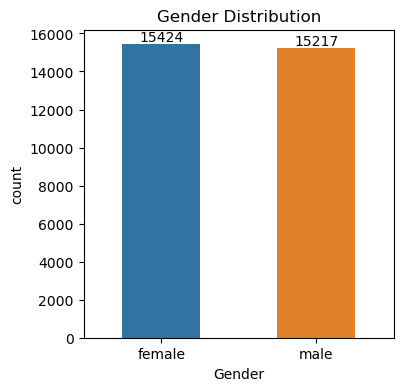

In [40]:
#Gender Distribution in School
plt.figure(figsize=(4,4))
ax = sns.countplot(x="Gender",data=df,hue='Gender',width=0.5)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Gender Distribution")
plt.show()

conclusion -- Male & Female are equally distributed...

In [30]:
#student score on parent education
gb = df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


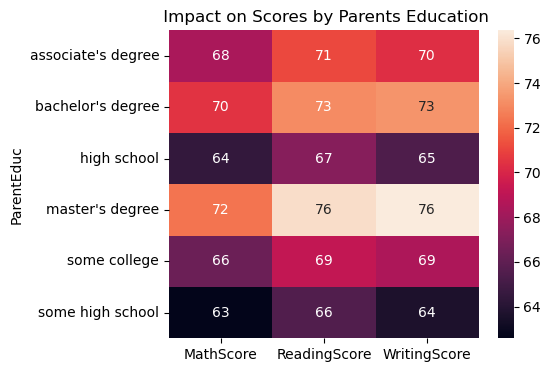

In [43]:
plt.figure(figsize=(5,4))
sns.heatmap(gb,annot=True)
plt.title(" Impact on Scores by Parents Education")
plt.show()

from above charts we can conclude that parents education also matters on children's marks.

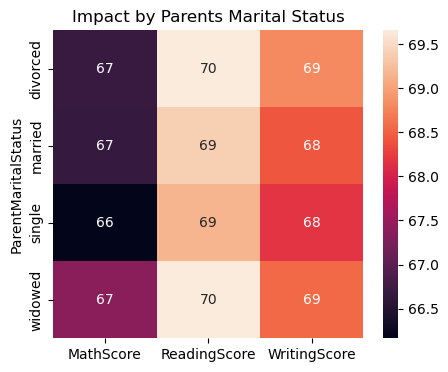

In [44]:
#student score on parents marital status
gb1 = df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
plt.figure(figsize=(5,4))
sns.heatmap(gb1,annot=True)
plt.title("Impact by Parents Marital Status")
plt.show()

from parents marital status we conclude that there is negligible impact on the student score due to their parent's marital status

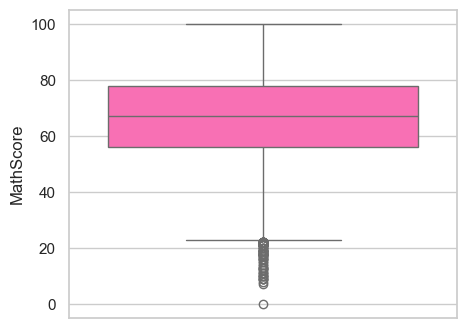

In [54]:
plt.figure(figsize=(5,4))
sns.set(style="whitegrid")
sns.boxplot(y="MathScore",data=df,color='hotpink',saturation=0.9)
plt.show()


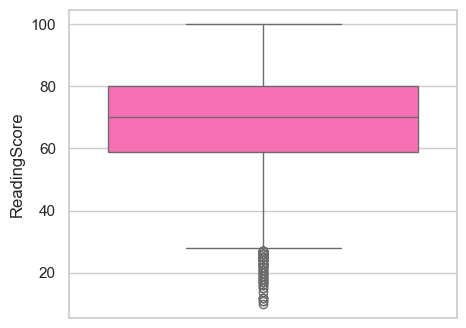

In [55]:
plt.figure(figsize=(5,4))
sns.set(style="whitegrid")
sns.boxplot(y="ReadingScore",data=df,color='hotpink',saturation=0.9)
plt.show()

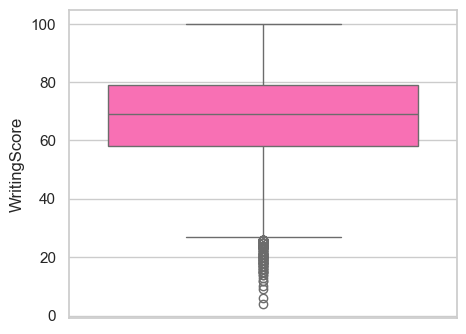

In [56]:
plt.figure(figsize=(5,4))
sns.set(style="whitegrid")
sns.boxplot(y="WritingScore",data=df,color='hotpink',saturation=0.9)
plt.show()

In [57]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

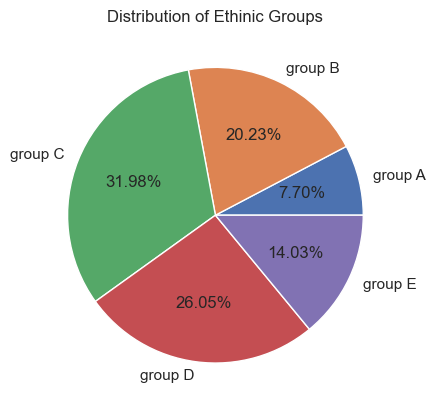

In [64]:
#Distribution of ethinic group
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC = df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE = df.loc[(df['EthnicGroup'] == 'group E')].count()

l = ['group A','group B','group C','group D','group E']
mlist = [groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
plt.pie(mlist,labels=l,autopct='%1.2f%%')
plt.title("Distribution of Ethinic Groups")
plt.show()

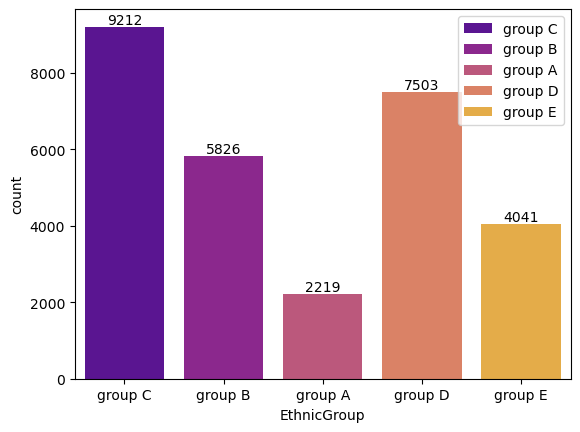

In [7]:
ax = sns.countplot(x='EthnicGroup',data=df,hue='EthnicGroup',palette='plasma')
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc =1)
plt.show()

In [8]:
df['TestPrep'].unique()

array(['none', nan, 'completed'], dtype=object)

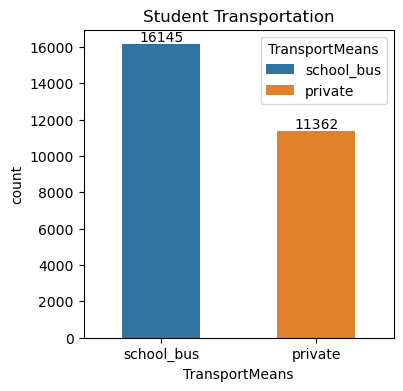

In [12]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="TransportMeans",data=df,hue='TransportMeans',width=0.5)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Student Transportation")
plt.show()

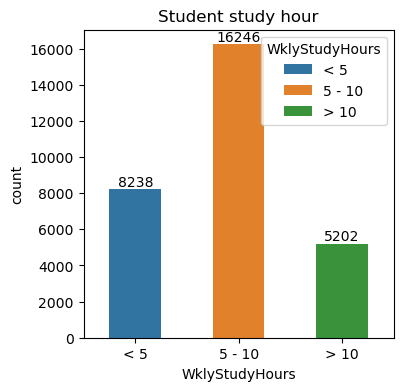

In [13]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="WklyStudyHours",data=df,hue='WklyStudyHours',width=0.5)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Student study hour")
plt.show()